In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))



In [20]:
from scripts.data_loader import DataPipeline
from scripts.symbols_constants import sp500_symbols

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from itertools import combinations

In [3]:
pipeline = DataPipeline(
    base_folder=r"C:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\data"
)

# Define symbols and dates
symbols = sp500_symbols
start_date = "2020-01-01"
end_date = "2023-12-31"

# Fetch and store data
data = pipeline.fetch_data(symbols, start_date, end_date)
pipeline.store_data(data, filename="raw_sp500")

data_2 = pipeline.load_data("raw_sp500")

data_wide = pipeline.flat_to_wide(data_2)
pipeline.store_data(data_wide, filename="wide_sp500")


[*********************100%***********************]  42 of 42 completed
c:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\scripts\data_loader.py:50: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data_long = data.stack(level=1).reset_index()


Method 'fetch_data' executed in 7.2067 seconds
Data saved to C:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\data\raw_sp500.csv
Method 'store_data' executed in 0.6298 seconds
Data loaded from C:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\data\raw_sp500.csv
Method 'load_data' executed in 0.1351 seconds
Data successfully transformed to wide format.
Method 'flat_to_wide' executed in 0.0187 seconds
Data saved to C:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\data\wide_sp500.csv
Method 'store_data' executed in 0.1569 seconds


C:\Users\LucaBenedetti\AppData\Local\Temp\ipykernel_22824\2443907475.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 43 + 1) instead
  rd_idx = np.random.random_integers(1,n_stocks,10)


<Axes: >

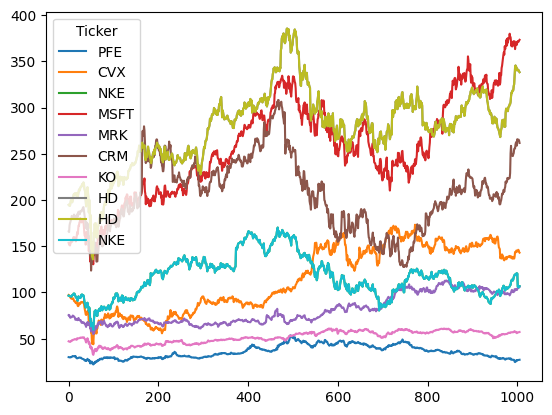

In [4]:
# show 10 random stocks
n_stocks = len(data_wide.columns)
rd_idx = np.random.random_integers(1,n_stocks,10)
# plot some stocks
data_wide.iloc[:,rd_idx].plot()


<Figure size 1200x600 with 0 Axes>

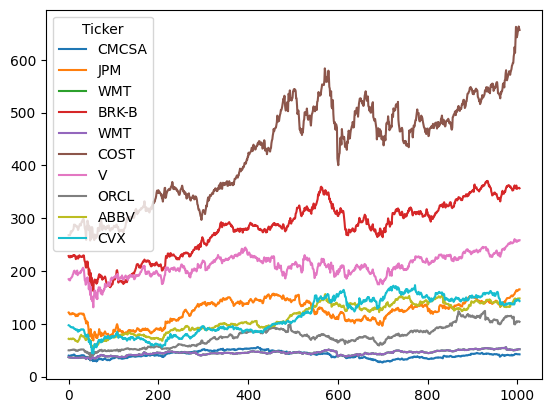

In [7]:
# print(data_wide.describe()) 

# Show 10 random stocks
n_stocks = len(data_wide.columns)
rd_idx = np.random.randint(1, n_stocks, 10)

# Plot some stocks with adjusted figure size
plt.figure(figsize=(12, 6))  # Adjust the size as needed
data_wide.iloc[:, rd_idx].plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

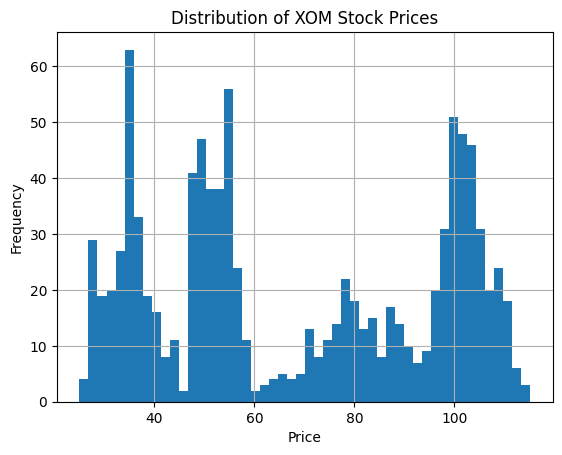

In [8]:
# Distribution of stock prices (take one random)
rd_idx = np.random.randint(1, n_stocks, 1)

plt.figure(figsize=(10, 6))
data_wide.iloc[:,rd_idx].dropna().hist(bins=50)  # Drop NaN values before plotting
plt.title(f'Distribution of {data_wide.columns[rd_idx][0]} Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

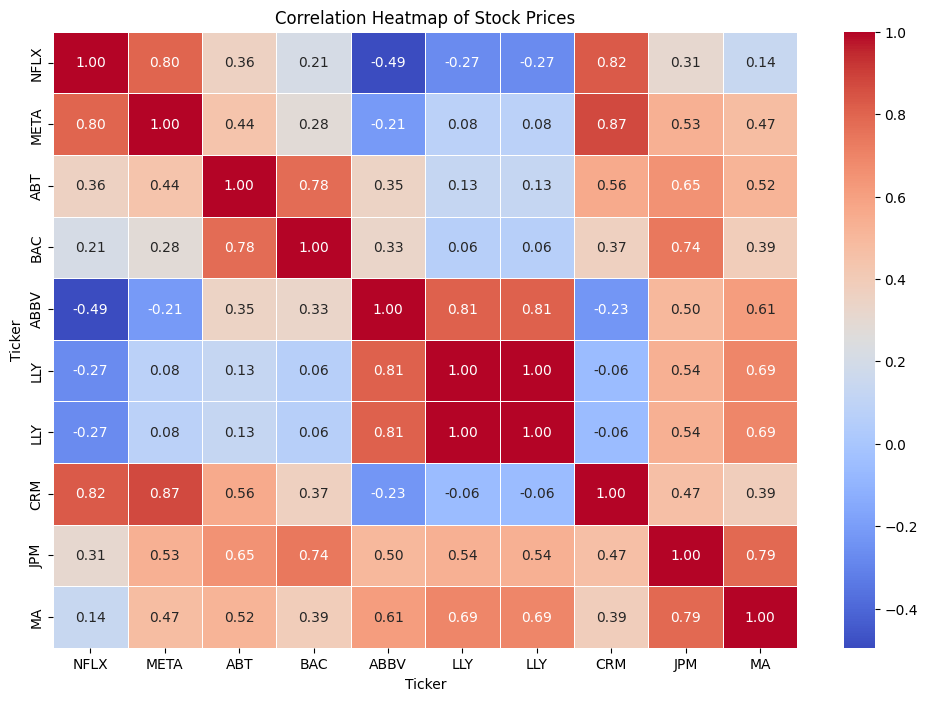

In [9]:
import seaborn as sns

# Calculate correlation matrix
rd_idx = np.random.randint(1, n_stocks, 10)

correlation_matrix = data_wide.iloc[:,rd_idx].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Stock Prices")
plt.show()

# TODO: take top 4 correlated (2 pos and 2 neg) and the 2 more uncorrelated and perform the analysis that follows
# analyze correlation with rolling windows
# analyze correlation with retruns instead of prices
# explore a little bit more


In [10]:
# Calculate correlation between two stocks, e.g., AAPL and MSFT
correlation = data_wide['AAPL'].corr(data_wide['MSFT'])
print(f"Correlation between AAPL and MSFT: {correlation}")


Correlation between AAPL and MSFT: 0.9392217910500807


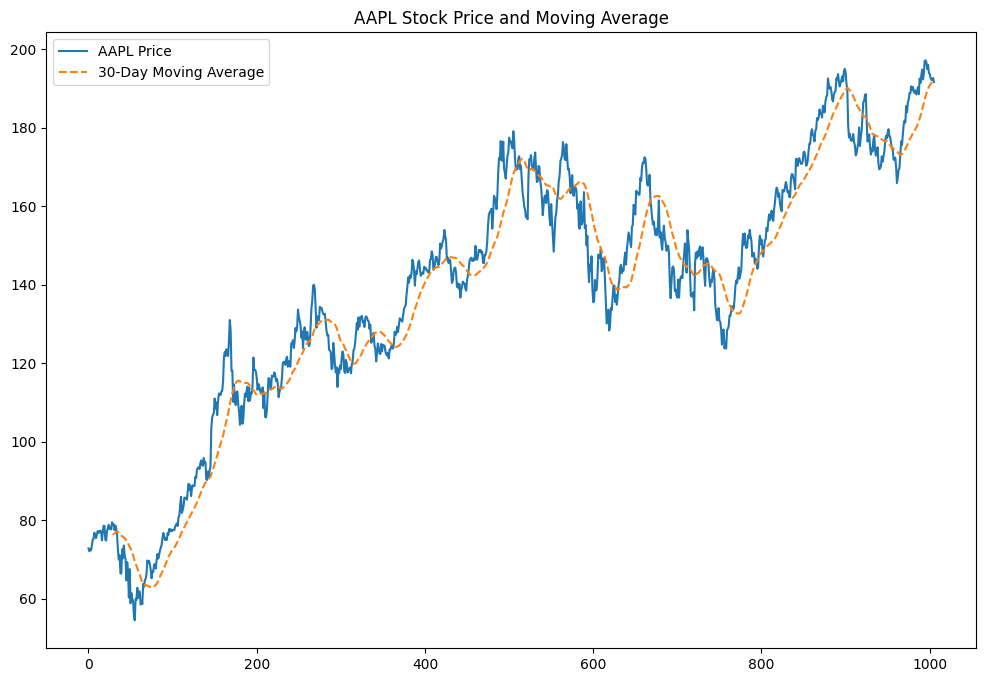

In [11]:
# Calculate moving averages for a smoother trend (e.g., 30-day moving average for AAPL)
data_wide['AAPL_MA30'] = data_wide['AAPL'].rolling(window=30).mean()

# Plot moving average
plt.figure(figsize=(12, 8))
plt.plot(data_wide.index, data_wide['AAPL'], label='AAPL Price')
plt.plot(data_wide.index, data_wide['AAPL_MA30'], label='30-Day Moving Average', linestyle='--')
plt.title('AAPL Stock Price and Moving Average')
plt.legend()
plt.show()


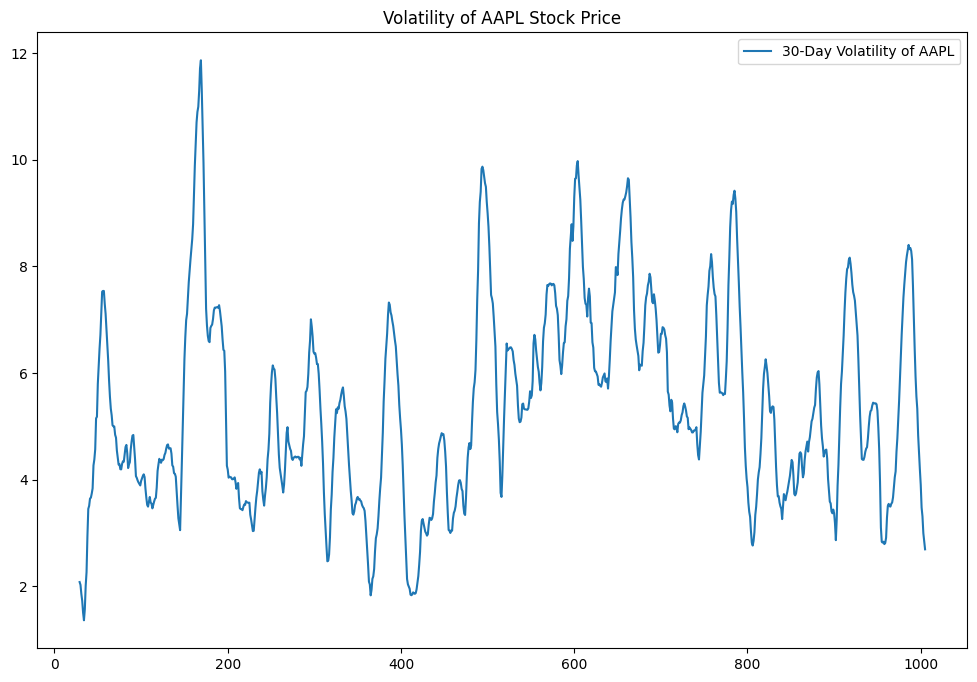

In [12]:
# Calculate rolling standard deviation (volatility) for AAPL
data_wide['AAPL_Volatility'] = data_wide['AAPL'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(12, 8))
plt.plot(data_wide.index, data_wide['AAPL_Volatility'], label='30-Day Volatility of AAPL')
plt.title('Volatility of AAPL Stock Price')
plt.legend()
plt.show()


Pairs identification with euclidean distance

In [19]:
data_wide.drop(columns=["AAPL_MA30","AAPL_Volatility"],inplace=True)

In [40]:
# Drop the Date column for pairwise distance calculations
price_data = data_wide.drop(columns=["Date"])

# Normalize the data (optional, to account for scale differences)
normalized_data = (price_data - price_data.mean()) / price_data.std()

# Compute pairwise Euclidean distances for all assets
asset_pairs = list(combinations(normalized_data.columns, 2))
distances = []

for pair in asset_pairs:
    asset1, asset2 = pair
    distance = np.linalg.norm(normalized_data[asset1] - normalized_data[asset2])
    distances.append((asset1, asset2, distance))

# Create a DataFrame to store the results
distance_df = pd.DataFrame(distances, columns=["Asset 1", "Asset 2", "Distance"])

# Sort by distance to find the closest pairs
best_pairs = distance_df.sort_values(by="Distance", ascending=True)
print(best_pairs)



    Asset 1 Asset 2   Distance
454     CVX     XOM   7.449554
667      MA       V   8.921418
76     ABBV     UNH   9.818920
51     ABBV     CVX   9.978372
23     AAPL    MSFT  11.052792
..      ...     ...        ...
560    INTC     XOM  59.919780
542    INTC     MRK  60.261525
648     LLY      VZ  60.834745
859      VZ     XOM  61.204912
705     MRK      VZ  61.458630

[861 rows x 3 columns]


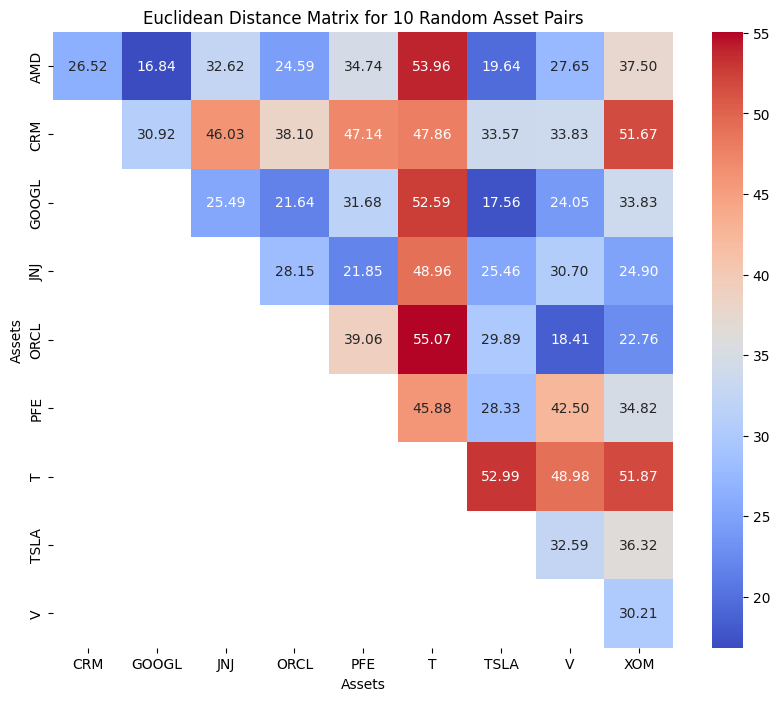

In [41]:
# Select 10 random assets from the data
random_assets = random.sample(list(normalized_data.columns), 10)

# Filter the distance_df to only include distances for the selected 10 random assets
filtered_distance_df = distance_df[
    (distance_df["Asset 1"].isin(random_assets)) & (distance_df["Asset 2"].isin(random_assets))
]

# Pivot the DataFrame for plotting
distance_matrix = filtered_distance_df.pivot(index="Asset 1", columns="Asset 2", values="Distance")

# Plot the distance matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(distance_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Euclidean Distance Matrix for 10 Random Asset Pairs")
plt.xlabel("Assets")
plt.ylabel("Assets")
plt.show()



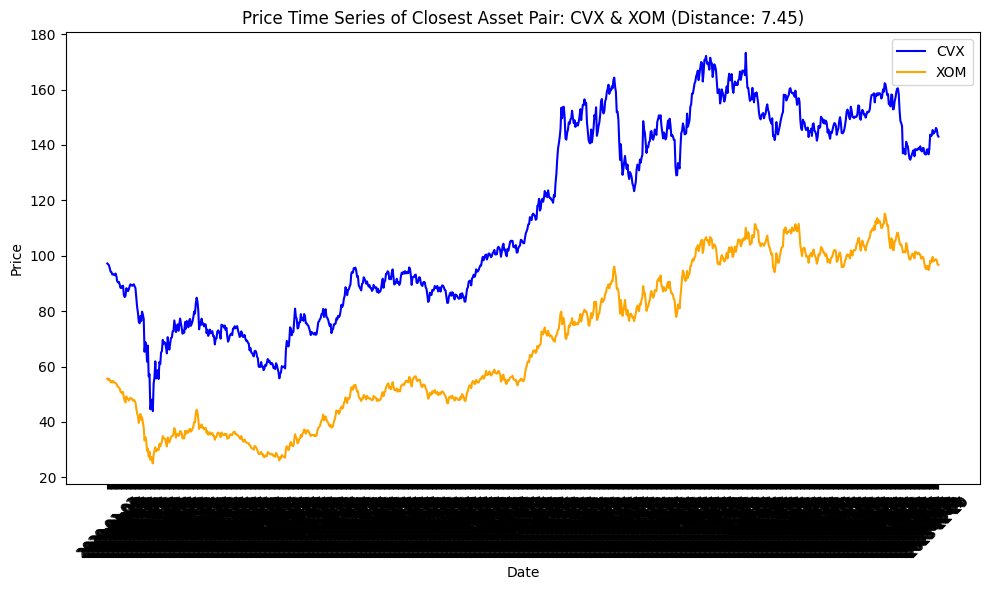

In [42]:
# Identify the closest pair (smallest distance)
min_dist_pair = best_pairs.iloc[0]
asset1, asset2 = min_dist_pair["Asset 1"], min_dist_pair["Asset 2"]
min_distance = min_dist_pair["Distance"]

# Plot the prices of the closest asset pair
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_wide[["Date", asset1, asset2]], x="Date", y=asset1, label=asset1, color="blue")
sns.lineplot(data=data_wide[["Date", asset1, asset2]], x="Date", y=asset2, label=asset2, color="orange")

plt.title(f"Price Time Series of Closest Asset Pair: {asset1} & {asset2} (Distance: {min_distance:.2f})")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



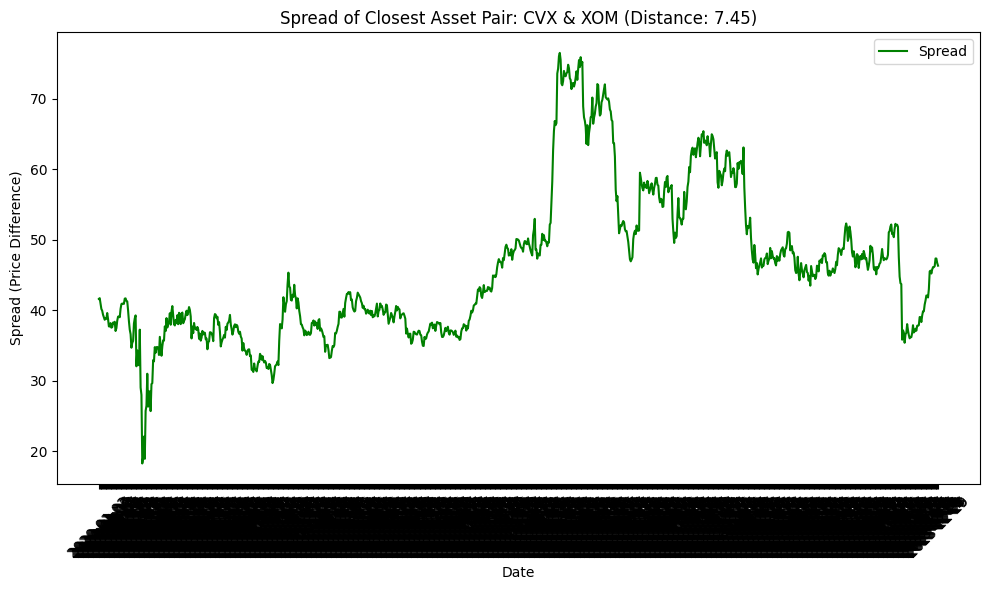

In [43]:
# Compute the spread of the closest asset pair (price difference over time)
spread = data_wide[asset1] - data_wide[asset2]

# Plot the spread over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_wide, x="Date", y=spread, label="Spread", color="green")

plt.title(f"Spread of Closest Asset Pair: {asset1} & {asset2} (Distance: {min_distance:.2f})")
plt.xlabel("Date")
plt.ylabel("Spread (Price Difference)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()